# **TON CRM Analytics - Data Analysis**

**Impotando bibliotecas necessárias**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [70]:
cases = pd.read_csv('data/cases_cleaned.csv', parse_dates = ['date_ref'])
creds = pd.read_csv('data/creds_cleaned.csv', parse_dates = ['cred_date'])

In [85]:
creds[creds['weekday_str'] == 'Sab']

,cred_date,ship_city,ship_state,max_machine,account_id,year,month,day,weekday,weekday_str
50,2019-07-27,São Paulo,SP,NONE,0011L00002WdJrIQAV,2019,7,27,5,Sab
51,2019-07-27,São José dos Pinhais,PR,NONE,0011L00002WdKhPQAV,2019,7,27,5,Sab
52,2019-07-27,Mauá,SP,T1,0011L00002WdRoXQAV,2019,7,27,5,Sab
53,2019-07-27,Itapetininga,SP,NONE,0011L00002WdNvjQAF,2019,7,27,5,Sab
54,2019-07-27,Valença,RJ,NONE,0011L00002WdJkRQAV,2019,7,27,5,Sab
55,2019-07-27,São Paulo,SP,NONE,0011L00002WdJgZQAV,2019,7,27,5,Sab
56,2019-07-27,Ipameri,GO,T1,0011L00002WdNrNQAV,2019,7,27,5,Sab
57,2019-07-27,Itumbiara,GO,NONE,0011L00002WdVU3QAN,2019,7,27,5,Sab
58,2019-07-27,Maracanaú,CE,NONE,0011L00002WdRqiQAF,2019,7,27,5,Sab
140,2019-08-03,Ituiutaba,MG,NONE,0011L00002WdzrWQAR,2019,8,3,5,Sab


In [77]:
credenciamentos = pd.pivot_table(creds, index = 'cred_date', values = 'account_id', aggfunc = 'count')

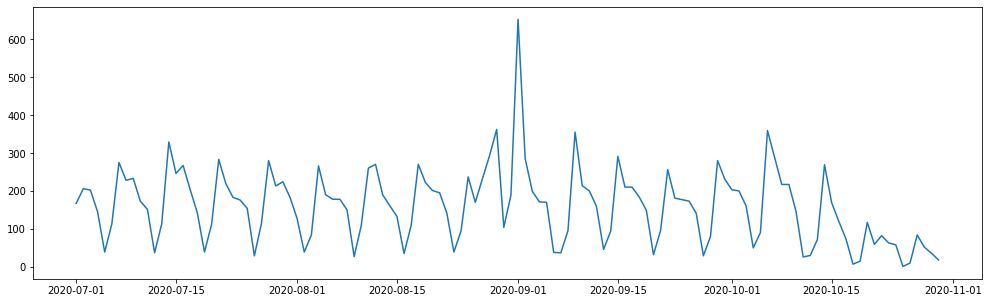

In [81]:
plt.figure(figsize = (17, 5))
plt.plot(credenciamentos[credenciamentos.index >= '2020-07-01']);

In [7]:
cases['waiting_timedelta'] = pd.to_timedelta(cases['waiting_timedelta'], unit = 'S')

In [17]:
cases['year'].value_counts()

2020    77489
Name: year, dtype: int64

In [12]:
cases.groupby('month').count()

,account_id,date_ref,waiting_time,missed,pesq_satisfacao,assunto,waiting_timedelta,year,day,weekday,weekday_str,node_1,node_2,node_3
month,,,,,,,,,,,,,,
2,91,91,91,91,77,91,91,91,91,91,91,91,87,71
3,708,708,708,708,582,708,708,708,708,708,708,708,699,569
4,1730,1730,1730,1730,1355,1730,1730,1730,1730,1730,1730,1730,1683,1452
5,3978,3978,3978,3978,3172,3978,3978,3978,3978,3978,3978,3978,3915,3387
6,8587,8587,8587,8587,6399,8587,8587,8587,8587,8587,8587,8566,8426,7228
7,15318,15318,15318,15318,0,15318,15318,15318,15318,15318,15318,15279,14973,12887
8,14305,14305,14305,14305,0,14305,14305,14305,14305,14305,14305,14291,14014,12229
9,17381,17381,17381,17381,0,17381,17381,17381,17381,17381,17381,17363,16827,14740
10,15391,15391,15391,15391,0,15391,15391,15391,15391,15391,15391,15377,15146,13001


In [52]:
chamados = pd.pivot_table(cases, index = 'date_ref', values = 'account_id', aggfunc = 'count')

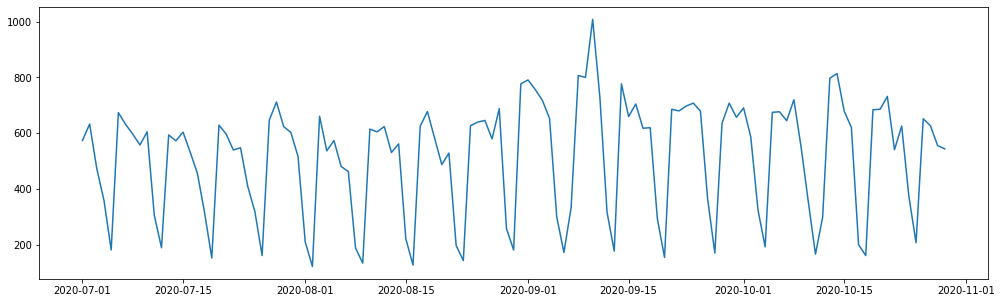

In [86]:
plt.figure(figsize = (17, 5))
plt.plot(chamados[chamados.index >= '2020-07-01']);

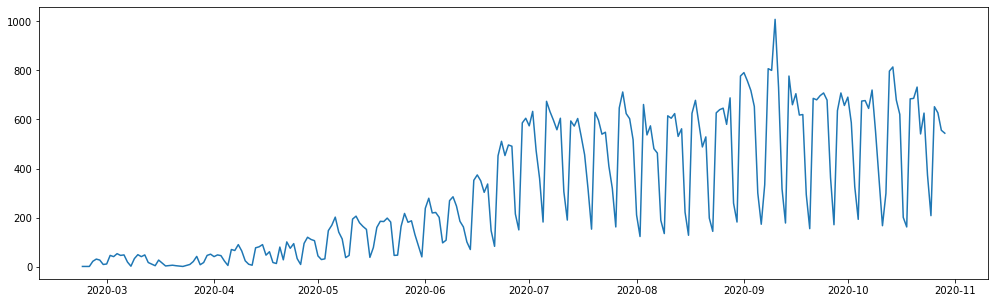

In [57]:
plt.figure(figsize = (17, 5))
plt.plot(chamados);

In [28]:
cases

,account_id,date_ref,waiting_time,missed,pesq_satisfacao,assunto,waiting_timedelta,year,month,day,weekday,weekday_str,node_1,node_2,node_3
0,0011L00002ZbpnlQAB,2020-02-23,19,False,Enviado,"['Produto', 'mPOS', 'Dúvidas mpos']",00:00:19,2020,2,23,6,Dom,Produto,mPOS,Dúvidas mpos
1,0011L00002dbBg5QAE,2020-02-25,15,False,Enviado,"['Aplicativo', 'Problema', '']",00:00:15,2020,2,25,1,Ter,Aplicativo,Problema,NaN
2,0011L00002WdgbcQAB,2020-02-26,15,False,Enviado,"['Aplicativo', 'Dúvidas funcionalidades App', ...",00:00:15,2020,2,26,2,Qua,Aplicativo,Dúvidas funcionalidades App,Redefinição de senha
3,0011L00002WdJgjQAF,2020-02-26,13,False,Enviado,"['Produto', 'mPOS', 'Problema POS - revertido']",00:00:13,2020,2,26,2,Qua,Produto,mPOS,Problema POS - revertido
4,0011L00002We7cjQAB,2020-02-26,72,False,Enviado,"['Aplicativo', '', '']",00:01:12,2020,2,26,2,Qua,Aplicativo,NaN,NaN
5,0011L00002cptcAQAQ,2020-02-26,12,False,NaN,"['Transferência de saldo', 'Conta bancária', '...",00:00:12,2020,2,26,2,Qua,Transferência de saldo,Conta bancária,Problema
6,0011L00002cptcAQAQ,2020-02-26,12,False,Enviado,"['Aplicativo', 'Dúvidas funcionalidades App', ...",00:00:12,2020,2,26,2,Qua,Aplicativo,Dúvidas funcionalidades App,Saldo
7,0011L00002dcq90QAA,2020-02-26,13,False,Enviado,"['Aplicativo', 'Dúvidas funcionalidades App', ...",00:00:13,2020,2,26,2,Qua,Aplicativo,Dúvidas funcionalidades App,Transferência bancária
8,0011L00002Wds1XQAR,2020-02-26,20,False,Enviado,"['Produto', 'Modelo de recebimento', '']",00:00:20,2020,2,26,2,Qua,Produto,Modelo de recebimento,NaN
9,0011L00002Zc66jQAB,2020-02-26,7,False,Enviado,"['Produto', 'mPOS', 'Ativação']",00:00:07,2020,2,26,2,Qua,Produto,mPOS,Ativação


In [49]:
(cases['node_1'].value_counts() / \
    cases['node_1'].value_counts().sum())

Produto                   0.286652
Aplicativo                0.265007
Logística                 0.201375
Cadastro                  0.081542
Pedido                    0.042206
Transferência de saldo    0.038936
Transação                 0.029270
Feedback do cliente       0.015572
Bandeira                  0.013711
Outros                    0.013646
Incidente                 0.006280
Bandeiras                 0.002972
Risco                     0.002093
Telecom                   0.000465
Comunicados               0.000271
Name: node_1, dtype: float64

In [43]:
cases.loc[cases['node_1'] == 'Produto', 'node_2'].value_counts() / \
    cases.loc[cases['node_1'] == 'Produto', 'node_2'].value_counts().sum() * 100

Cartão pré-pago          26.717833
D195                     22.695260
S920                     18.821670
Pinpad                   11.259594
Modelo de recebimento    11.232506
Promoções                 5.092551
mPOS                      3.079007
Simulação de vendas       1.101580
Name: node_2, dtype: float64